# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+weather_api_key
#units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind_speed = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | sinabang
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | hudson
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | la passe
Processing Record 10 of Set 1 | hamburg
Processing Record 11 of Set 1 | gadzhiyevo
Processing Record 12 of Set 1 | villa allende
Processing Record 13 of Set 1 | argo
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | olyokminsk
Processing Record 17 of Set 1 | chulym
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | mitu
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | longyearbyen
Processi

In [6]:
#test = requests.get(url + "appid=" + weather_api_key + "&q=" + "barranca" + "&units=" + units + "q=").json()
#units = "Metrics"
#test

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.81,70,78,14.65,TF,1706633019
1,yellowknife,62.4560,-114.3525,-4.77,100,100,6.71,CA,1706633019
2,albany,42.6001,-73.9662,0.37,84,90,2.19,US,1706632892
3,sinabang,2.4803,96.3801,27.04,81,98,2.14,ID,1706633019
4,ust-nera,64.5667,143.2000,-35.31,100,99,0.55,RU,1706633019


In [9]:
# Export the City_Data into a csv
output_folder = "output_data"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.81,70,78,14.65,TF,1706633019
1,yellowknife,62.4560,-114.3525,-4.77,100,100,6.71,CA,1706633019
2,albany,42.6001,-73.9662,0.37,84,90,2.19,US,1706632892
3,sinabang,2.4803,96.3801,27.04,81,98,2.14,ID,1706633019
4,ust-nera,64.5667,143.2000,-35.31,100,99,0.55,RU,1706633019


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

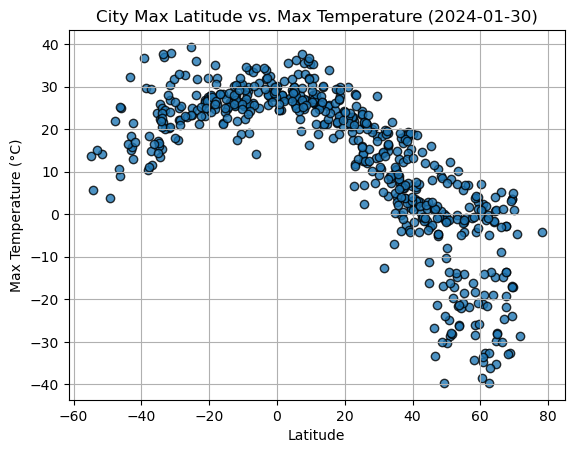

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.8, marker="o", linewidths=1)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Max Temperature (%s)' %time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

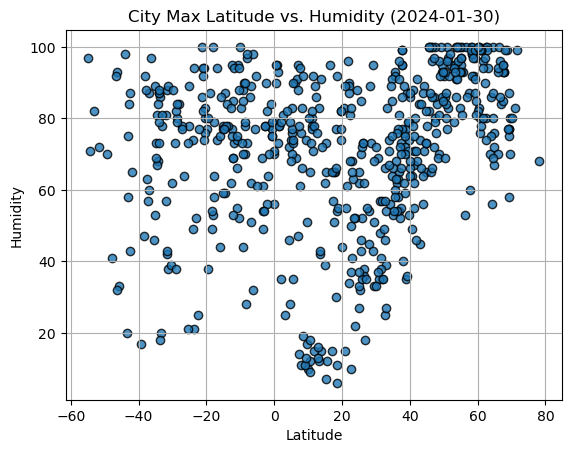

In [12]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.8, marker="o", linewidths=1)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Humidity (%s)' %time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

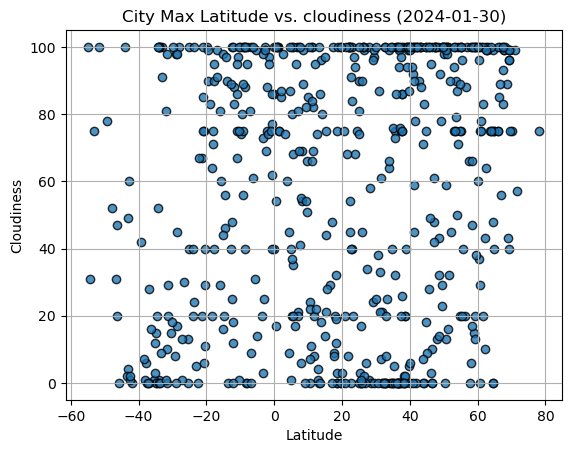

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.8, marker="o", linewidths=1)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. cloudiness (%s)' %time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

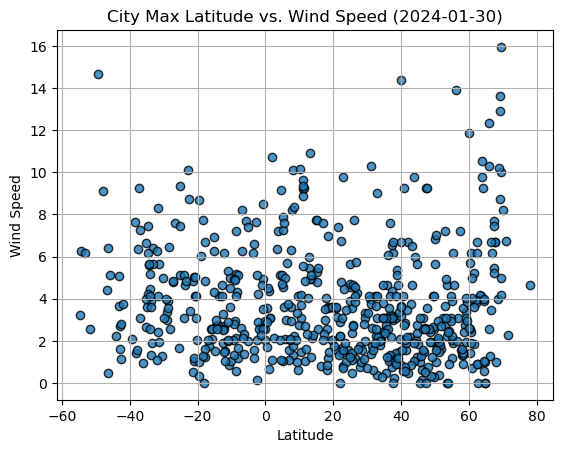

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.8, marker="o", linewidths=1)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Max Latitude vs. Wind Speed (%s)' %time.strftime("%Y-%m-%d"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def Linear_regression_plot(x_value, y_value,title, text_coord):
    (slope, intercept, r_value, p_value, stdev) = linregress(x_value, y_value)
    regres_value = x_value * slope + intercept
    line_eq = "Y = "+ str(round(slope,2))+ "x +" + str(round(intercept,2))



    #plot
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regres_value, "r--")
    plt.annotate(line_eq, text_coord, fontsize = 15,color = "black")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {r_value**2}")
    plt.show()

In [16]:
northern_hemisphere = city_data_df.loc[city_data_df["Lat"]>= 0]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-4.77,100,100,6.71,CA,1706633019
2,albany,42.6001,-73.9662,0.37,84,90,2.19,US,1706632892
3,sinabang,2.4803,96.3801,27.04,81,98,2.14,ID,1706633019
4,ust-nera,64.5667,143.2000,-35.31,100,99,0.55,RU,1706633019
5,hudson,40.7168,-74.0663,3.50,64,100,4.12,US,1706632995


In [17]:
southern_hemisphere = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.81,70,78,14.65,TF,1706633019
6,grytviken,-54.2811,-36.5092,5.81,71,31,6.27,GS,1706633020
7,edinburgh of the seven seas,-37.0676,-12.3116,14.82,60,28,7.24,SH,1706633020
11,villa allende,-31.2946,-64.2954,37.84,38,20,5.66,AR,1706633020
13,adamstown,-25.0660,-130.1015,23.31,89,100,9.33,PN,1706633021


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemisphere = city_data_df.loc[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,-4.77,100,100,6.71,CA,1706633019
2,albany,42.6001,-73.9662,0.37,84,90,2.19,US,1706632892
3,sinabang,2.4803,96.3801,27.04,81,98,2.14,ID,1706633019
4,ust-nera,64.5667,143.2000,-35.31,100,99,0.55,RU,1706633019
5,hudson,40.7168,-74.0663,3.50,64,100,4.12,US,1706632995


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemisphere = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.81,70,78,14.65,TF,1706633019
6,grytviken,-54.2811,-36.5092,5.81,71,31,6.27,GS,1706633020
7,edinburgh of the seven seas,-37.0676,-12.3116,14.82,60,28,7.24,SH,1706633020
11,villa allende,-31.2946,-64.2954,37.84,38,20,5.66,AR,1706633020
13,adamstown,-25.0660,-130.1015,23.31,89,100,9.33,PN,1706633021


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6941524511931763


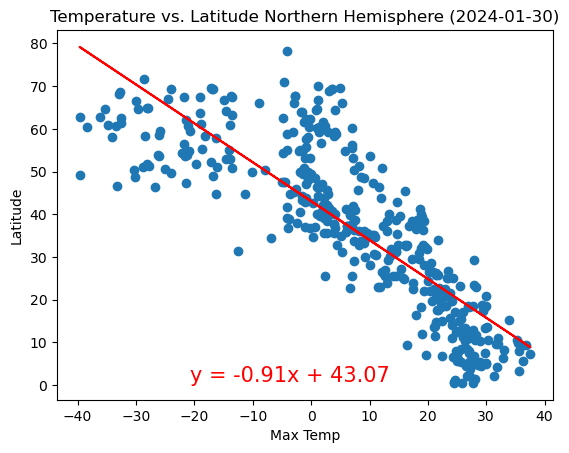

In [20]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemisphere['Max Temp']
y_values = northern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20.8,0.8),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title('Temperature vs. Latitude Northern Hemisphere (%s)' %time.strftime("%Y-%m-%d"))
# plt.title('City Max Latitude vs. Wind Speed (%s)' %time.strftime("%Y-%m-%d"))
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3029467863891867


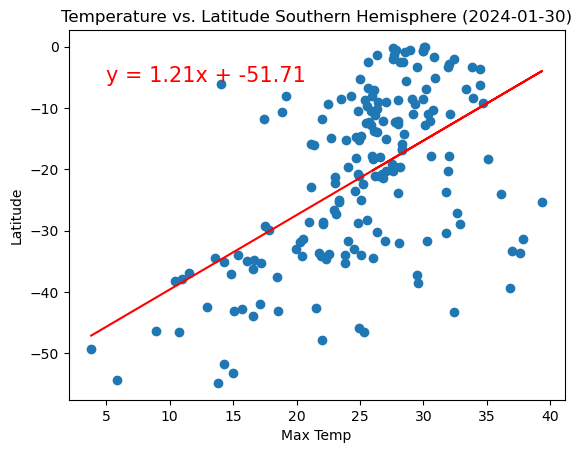

In [29]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemisphere['Max Temp']
y_values = southern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-5.8),fontsize=15,color="red")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.title('Temperature vs. Latitude Southern Hemisphere (%s)' %time.strftime("%Y-%m-%d"))
# plt.title('City Max Latitude vs. Wind Speed (%s)' %time.strftime("%Y-%m-%d"))
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In both hemispheres, there is a prominent linear regression observed between temperature and latitude. As one moves farther from the equator, there is a consistent decline in temperature, indicating a strong correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

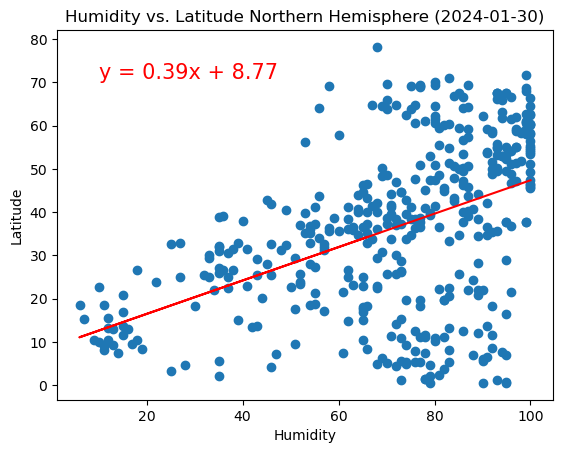

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = northern_hemisphere['Humidity']
y_values = northern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,70.8),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Humidity vs. Latitude Northern Hemisphere (%s)' %time.strftime("%Y-%m-%d"))
# plt.title('City Max Latitude vs. Wind Speed (%s)' %time.strftime("%Y-%m-%d"))
print(f"The r-squared is: {rvalue**2}")
plt.show()

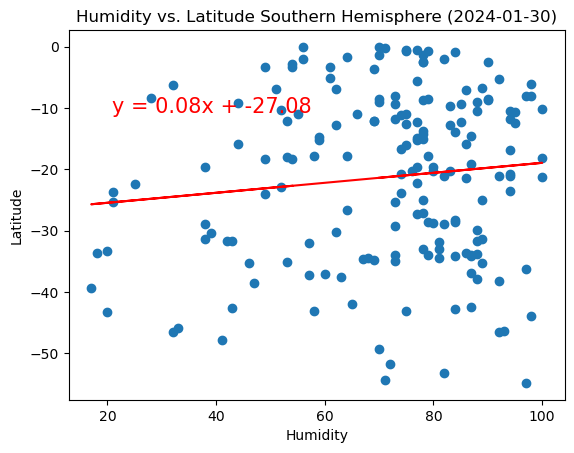

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemisphere['Humidity']
y_values = southern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20.8,-10.8),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Humidity vs. Latitude Southern Hemisphere (%s)' %time.strftime("%Y-%m-%d"))
# plt.title('City Max Latitude vs. Wind Speed (%s)' %time.strftime("%Y-%m-%d"))
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the Northern Hemisphere, there's a discernible trend in which humidity tends to increase as latitude rises. However, in the Southern Hemisphere, while a similar pattern is observed, the data points exhibit greater variability, resulting in a more sporadic relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

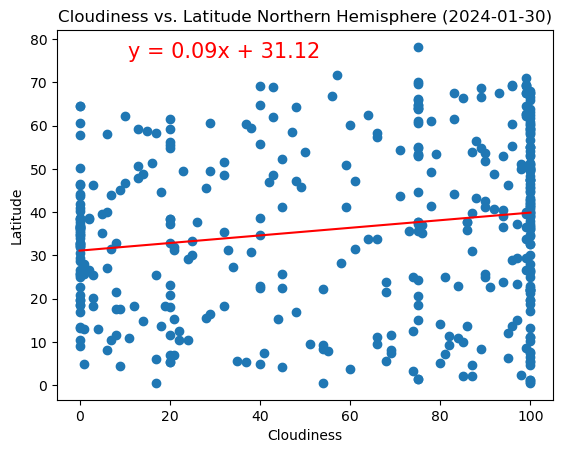

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemisphere['Cloudiness']
y_values = northern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10.8,75.8),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Cloudiness vs. Latitude Northern Hemisphere (%s)' %time.strftime("%Y-%m-%d"))
# plt.title('City Max Latitude vs. Wind Speed (%s)' %time.strftime("%Y-%m-%d"))
print(f"The r-squared is: {rvalue**2}")
plt.show()

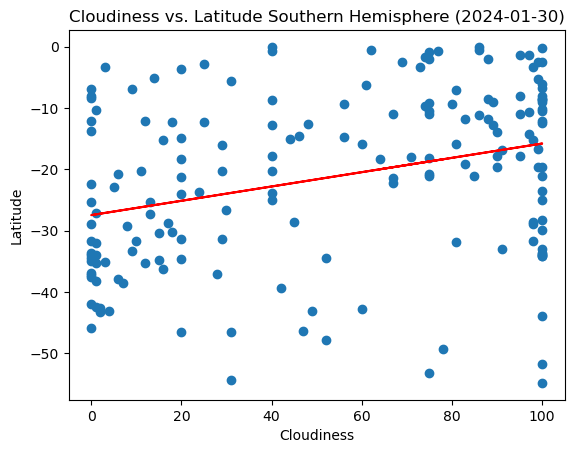

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemisphere['Cloudiness']
y_values = southern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10.8,75.8),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title('Cloudiness vs. Latitude Southern Hemisphere (%s)' %time.strftime("%Y-%m-%d"))
# plt.title('City Max Latitude vs. Wind Speed (%s)' %time.strftime("%Y-%m-%d"))
print(f"The r-squared is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between cloudiness and latitude is not visually apparent.

### Wind Speed vs. Latitude Linear Regression Plot

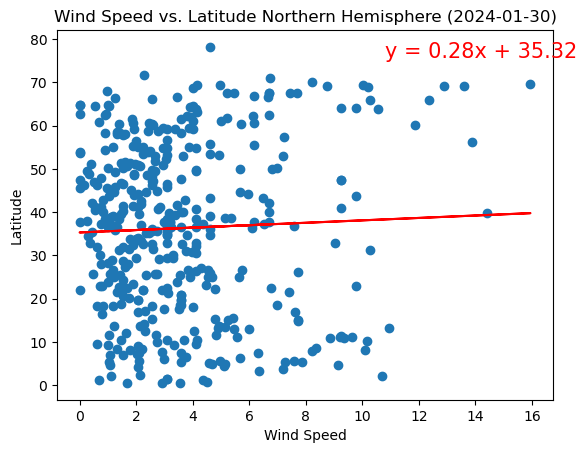

In [26]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemisphere['Wind Speed']
y_values = northern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10.8,75.8),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Wind Speed vs. Latitude Northern Hemisphere (%s)' %time.strftime("%Y-%m-%d"))
# plt.title('City Max Latitude vs. Wind Speed (%s)' %time.strftime("%Y-%m-%d"))
print(f"The r-squared is: {rvalue**2}")
plt.show()

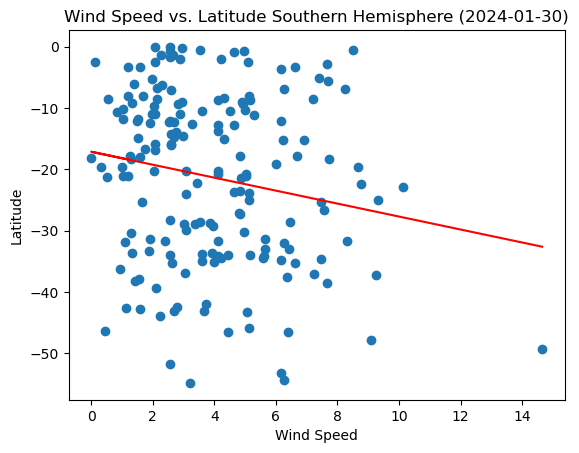

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemisphere['Wind Speed']
y_values = southern_hemisphere['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10.8,75.8),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.title('Wind Speed vs. Latitude Southern Hemisphere (%s)' %time.strftime("%Y-%m-%d"))
# plt.title('City Max Latitude vs. Wind Speed (%s)' %time.strftime("%Y-%m-%d"))
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The linear relationship between wind and latitude is not visually apparent.